In [21]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
addict                        2.4.0
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.3.0
aliyun-python-sdk-core        2.13.36
aliyun-python-sdk-kms         2.16.0
antlr4-python3-runtime        4.8
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
astor                         0.8.1
async-timeout                 4.0.2
asynctest                     0.13.0
attrs                         22.1.0
audioread                     3.0.0
autopep8                      2.0.0
av                            10.0.0
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.11.1
bitarray                      2.6.0
bleach                        5.0.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [1]:
class DBscan:
    def __init__(self,eps,MinPts):
        self.eps = eps
        self.MinPts = MinPts
    
    def regionQuery(self,i,x):
        diff = i - x
        distances = np.sqrt(np.square(diff).sum(axis=1))
        #返回邻域点的索引
        return list(np.where(distances <= self.eps)[0])
    
    def fit(self,x):
        #初始标签为-1
        label = -1
        m =len(x)
        #初始化所有样本点所属的类别，定为-1
        cluster = [-1 for i in range(m)]
        #已访问样本点
        visited = []      
        for p in range(m):
            if p not in visited:
                NeighborPts = self.regionQuery(x[p],x)
                if len(NeighborPts) < self.MinPts:
                    #默认标记为-1，后面可能会被加入到其他的邻域内，成为一个密度可达点
                    continue
                else:
                    label += 1
                    cluster[p] = label
                    #列表NeighborPts是动态变化的，添加没有访问过的全部密度可达点，划分到一个簇
                    for p_1 in NeighborPts:
                        if p_1 not in visited:
                            visited.append(p_1)
                            Ner_NeighborPts = self.regionQuery(x[p_1],x)
                            if len(Ner_NeighborPts) >= self.MinPts:
                                for a in Ner_NeighborPts:
                                    if a not in NeighborPts:
                                        NeighborPts.append(a)
                            #同时把p_1的类别改为label
                            cluster[p_1] = label
        return cluster

In [4]:
df = pd.read_csv('car_price.csv')
# 使用af保存原始数据
af = df.copy()
# 以下各列指定数值进行转化
df['cylindernumber']=df.cylindernumber.replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
df['doornumber']=df.doornumber.replace({'two':2,'four':4})

# 以下各列转为离散数字编码
# df['CarName'] = pd.Categorical(df['CarName']).codes
df['fueltype'] = pd.Categorical(df['fueltype']).codes
df['aspiration'] = pd.Categorical(df['aspiration']).codes
df['doornumber'] = pd.Categorical(df['doornumber']).codes
df['carbody'] = pd.Categorical(df['carbody']).codes
df['drivewheel'] = pd.Categorical(df['drivewheel']).codes
df['enginelocation'] = pd.Categorical(df['enginelocation']).codes
df['enginetype'] = pd.Categorical(df['enginetype']).codes
# df['cylindernumber'] = pd.Categorical(df['cylindernumber']).codes
df['fuelsystem'] = pd.Categorical(df['fuelsystem']).codes

nf = df.copy()
df.drop(columns=['CarName'], inplace=True)
df.drop(columns=['car_ID'], inplace=True)
# 去掉无关列

df = df.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)))
# 数据归一化
print('数据归一化后的df如下')
data = np.array(list(df.to_numpy()))
df

数据归一化后的df如下


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,1.0,0.0,0.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,...,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959
1,1.0,1.0,0.0,0.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,...,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.6,1.0,0.0,0.0,0.50,1.0,0.0,0.230321,0.449254,0.433333,...,0.343396,0.714286,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.8,1.0,0.0,1.0,0.75,0.5,0.0,0.384840,0.529851,0.491667,...,0.181132,0.714286,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.8,1.0,0.0,1.0,0.75,0.0,0.0,0.373178,0.529851,0.508333,...,0.283019,0.714286,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,1.0,0.0,1.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,...,0.301887,0.714286,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.291123
201,0.2,1.0,1.0,1.0,0.75,1.0,0.0,0.655977,0.711940,0.708333,...,0.301887,0.714286,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.345738
202,0.2,1.0,0.0,1.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,...,0.422642,0.714286,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.406311
203,0.2,0.0,1.0,1.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,...,0.316981,0.428571,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,0.430763


In [16]:
# 模型评价指标计算
from sklearn.metrics import davies_bouldin_score

# Silhouette Coefficient Index

def get_silhouette_coefficient(X, labels):
    n_clusters = np.unique(labels).shape[0]
    s = []
    for k in range(n_clusters):  # 遍历每一个簇
        index = (labels == k)  # 取对应簇所有样本的索引
        x_in_cluster = X[index]  # 去对应簇中的所有样本
        for sample in x_in_cluster:  # 计算每个样本的轮廓系数
            a = ((sample - x_in_cluster) ** 2).sum(axis=1)
            a = np.sqrt(a).sum() / (len(a) - 1)  # 去掉当前样本点与当前样本点的组合计数
            nearest_cluster_id = None
            min_dist2 = np.inf
            for c in range(n_clusters):  # 寻找距离当前样本点最近的簇
                if k == c:
                    continue
                centroid = X[labels == c].mean(axis=0)
                dist2 = ((sample - centroid) ** 2).sum()
                if dist2 < min_dist2:
                    nearest_cluster_id = c
                    min_dist2 = dist2
            x_nearest_cluster = X[labels == nearest_cluster_id]
            b = ((sample - x_nearest_cluster) ** 2).sum(axis=1)
            b = np.sqrt(b).mean()
            s.append((b - a) / np.max([a, b]))
    return np.mean(s)

# Calinski-Harabasz Index

def get_calinski_harabasz(X, labels):
    n_samples = X.shape[0]
    n_clusters = np.unique(labels).shape[0]
    betw_disp = 0.  # 所有的簇间距离和
    within_disp = 0.  # 所有的簇内距离和
    global_centroid = np.mean(X, axis=0)  # 全局簇中心
    for k in range(n_clusters):  # 遍历每一个簇
        x_in_cluster = X[labels == k]  # 取当前簇中的所有样本
        centroid = np.mean(x_in_cluster, axis=0)  # 计算当前簇的簇中心
        within_disp += np.sum((x_in_cluster - centroid) ** 2)
        betw_disp += len(x_in_cluster) * np.sum((centroid - global_centroid) ** 2)
    return (1. if within_disp == 0. else
            betw_disp * (n_samples - n_clusters) /
            (within_disp * (n_clusters - 1.)))

# Davies-Bouldin Index
def get_davies_bouldin(X, labels):
    n_clusters = np.unique(labels).shape[0]
    centroids = np.zeros((n_clusters, len(X[0])), dtype=float)
    s_i = np.zeros(n_clusters)
    for k in range(n_clusters):  # 遍历每一个簇
        x_in_cluster = X[labels == k]  # 取当前簇中的所有样本
        centroids[k] = np.mean(x_in_cluster, axis=0)  # 计算当前簇的簇中心
        s_i[k] = euclidDistance(x_in_cluster, [centroids[k]]).mean()  #
    centroid_distances = euclidDistance(centroids)  # [K,K]
    combined_s_i_j = s_i[:, None] + s_i  # [K,k]
    centroid_distances[centroid_distances == 0] = np.inf
    scores = np.max(combined_s_i_j / centroid_distances, axis=1)
    return np.mean(scores)
print('以上为评价指标计算')

以上为评价指标计算


In [8]:
eps = 1
for i in range(3, 12, 1):
    Dbscan =DBscan(eps,MinPts=i)
    y_pred = Dbscan.fit(data)
    dblabels = np.array(y_pred)+1
    data_valid = data
    print(i)
    print(f"轮廓系数: {get_silhouette_coefficient(data_valid, dblabels)}")
    print(f"方差比: {get_calinski_harabasz(data_valid, dblabels)}")
    print(f"DB指数: {davies_bouldin_score(data_valid, dblabels)}")

3
轮廓系数: 0.30503949842514166
方差比: 34.28725649827263
DB指数: 1.3058235918797383
4
轮廓系数: 0.31493746038598275
方差比: 36.68131737213992
DB指数: 1.4775440750332287
5
轮廓系数: 0.31493746038598275
方差比: 36.68131737213992
DB指数: 1.4775440750332287
6
轮廓系数: 0.3364998559683405
方差比: 37.218445899468854
DB指数: 1.786691696474689
7
轮廓系数: 0.3364998559683405
方差比: 37.218445899468854
DB指数: 1.786691696474689
8
轮廓系数: 0.3277308452715997
方差比: 36.71132066427044
DB指数: 1.7579078008205054
9
轮廓系数: 0.3222730670068356
方差比: 39.45567230028974
DB指数: 1.9652897579974877
10
轮廓系数: 0.3222730670068356
方差比: 39.45567230028974
DB指数: 1.9652897579974877
11
轮廓系数: 0.3222730670068356
方差比: 39.45567230028974
DB指数: 1.9652897579974877


In [10]:
MinPts=6
eps = 0.4
for i in range(3, 11, 1):
    eps+=0.1
    Dbscan =DBscan(eps,MinPts)
    y_pred = Dbscan.fit(data)
    dblabels = np.array(y_pred)+1
    data_valid = data
    print(eps)
    print(f"轮廓系数: {get_silhouette_coefficient(data_valid, dblabels)}")
    print(f"方差比: {get_calinski_harabasz(data_valid, dblabels)}")
    print(f"DB指数: {davies_bouldin_score(data_valid, dblabels)}")

0.5
轮廓系数: 0.014146502326817736
方差比: 13.863052486412245
DB指数: 1.7793444883412952
0.6
轮廓系数: 0.14569555798769873
方差比: 22.57413410955074
DB指数: 1.7368174037424464
0.7
轮廓系数: 0.2779884730110242
方差比: 34.29713010737719
DB指数: 1.8116989167401925
0.7999999999999999
轮廓系数: 0.3171713801636255
方差比: 31.148140923202583
DB指数: 1.867029821911787
0.8999999999999999
轮廓系数: 0.34309713558982713
方差比: 35.86087305826112
DB指数: 1.8585343953354405
0.9999999999999999
轮廓系数: 0.3364998559683405
方差比: 37.218445899468854
DB指数: 1.786691696474689
1.0999999999999999
轮廓系数: 0.27327001366305015
方差比: 23.934237716110363
DB指数: 1.3673930293575982
1.2
轮廓系数: 0.2617964219452193
方差比: 24.437648207399654
DB指数: 1.0406174868151987


In [12]:
print('选择最优参数为eps=0.9,MinPts=6')

选择最优参数为eps=0.9,MinPts=6


In [13]:
Dbscan =DBscan(eps=0.9,MinPts=6)
y_pred = Dbscan.fit(data)
dblabels = np.array(y_pred)+1
print('以下为手写DBSCAN聚类结果')
print(dblabels)
print('据结果来看分为了六类')

以下为手写DBSCAN聚类结果
[1 1 1 2 2 1 2 2 5 0 1 2 1 2 2 2 1 2 1 1 2 1 1 3 2 2 2 3 2 3 1 1 1 1 1 2 2
 1 1 2 2 2 1 2 1 2 1 2 2 0 1 1 1 2 2 1 1 1 1 1 2 1 2 0 2 2 0 4 4 0 4 2 1 2
 0 3 1 1 1 3 3 1 3 3 3 2 2 0 2 1 0 1 2 2 1 1 2 2 1 2 2 2 2 2 1 3 1 2 4 2 4
 2 4 2 4 2 4 5 1 3 2 2 2 2 3 1 0 0 0 0 2 1 1 2 1 2 3 5 1 1 1 2 2 2 2 0 2 2
 2 0 1 1 2 2 2 2 2 2 0 0 2 2 2 1 1 1 1 1 1 1 1 1 1 2 4 2 2 2 1 1 2 2 0 1 0
 2 2 4 2 1 1 2 4 2 2 2 2 2 5 5 2 5 2 4 5]
据结果来看分为了六类


In [19]:
print("手写DBSCAN聚类结果评价")
print(f"轮廓系数: {get_silhouette_coefficient(data_valid, dblabels)}")
print(f"方差比: {get_calinski_harabasz(data_valid, dblabels)}")
print(f"DB指数: {davies_bouldin_score(data_valid, dblabels)}")

手写DBSCAN聚类结果评价
轮廓系数: 0.34309713558982713
方差比: 35.86087305826112
DB指数: 1.8585343953354405


In [17]:
# DBSCAN聚类
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.9, min_samples=6).fit(data)
dlabels = db.labels_ + 1
print('以下为使用sklearn的DBSCAN聚类结果')
print(dlabels)

以下为使用sklearn的DBSCAN聚类结果
[1 1 1 2 2 1 2 2 5 0 1 2 1 2 2 2 1 2 1 1 2 1 1 3 2 2 2 3 2 3 1 1 1 1 1 2 2
 1 1 2 2 2 1 2 1 2 1 2 2 0 1 1 1 2 2 1 1 1 1 1 2 1 2 0 2 2 0 4 4 0 4 2 1 2
 0 3 1 1 1 3 3 1 3 3 3 2 2 0 2 1 0 1 2 2 1 1 2 2 1 2 2 2 2 2 1 3 1 2 4 2 4
 2 4 2 4 2 4 5 1 3 2 2 2 2 3 1 0 0 0 0 2 1 1 2 1 2 3 5 1 1 1 2 2 2 2 0 2 2
 2 0 1 1 2 2 2 2 2 2 0 0 2 2 2 1 1 1 1 1 1 1 1 1 1 2 4 2 2 2 1 1 2 2 0 1 0
 2 2 4 2 1 1 2 4 2 2 2 2 2 5 5 2 5 2 4 5]


In [20]:
print("第三方库DBSCAN聚类结果评价")
print(f"轮廓系数: {get_silhouette_coefficient(data, dlabels)}")
print(f"方差比: {get_calinski_harabasz(data, dlabels)}")
print(f"DB指数: {davies_bouldin_score(data, dlabels)}")
print('与自定义代码实现结果评价基本相同，实验成功')

第三方库DBSCAN聚类结果评价
轮廓系数: 0.34309713558982713
方差比: 35.86087305826112
DB指数: 1.8585343953354405
与自定义代码实现结果评价基本相同，实验成功


六类的ID:

No.0 [ 10  50  64  67  70  75  88  91 127 128 129 130 146 150 159 160 183 185]

No.1 [  1   2   3   6  11  13  17  19  20  22  23  31  32  33  34  35  38  39
  43  45  47  51  52  53  56  57  58  59  60  62  73  77  78  79  82  90
  92  95  96  99 105 107 119 126 132 133 135 139 140 141 151 152 164 165
 166 167 168 169 170 171 172 173 179 180 184 190 191]

No.2 [  4   5   7   8  12  14  15  16  18  21  25  26  27  29  36  37  40  41
  42  44  46  48  49  54  55  61  63  65  66  72  74  86  87  89  93  94
  97  98 100 101 102 103 104 108 110 112 114 116 121 122 123 124 131 134
 136 142 143 144 145 147 148 149 153 154 155 156 157 158 161 162 163 174
 176 177 178 181 182 186 187 189 192 194 195 196 197 198 201 203]

No.3 [ 24  28  30  76  80  81  83  84  85 106 120 125 137]

No.4 [ 68  69  71 109 111 113 115 117 175 188 193 204]

No.5 [  9 118 138 199 200 202 205]

六类的产品名:

No.0 ['audi 5000s (diesel)', 'jaguar xk', 'mazda glc deluxe', 'mazda rx-7 gs', 'buick century', 'buick regal

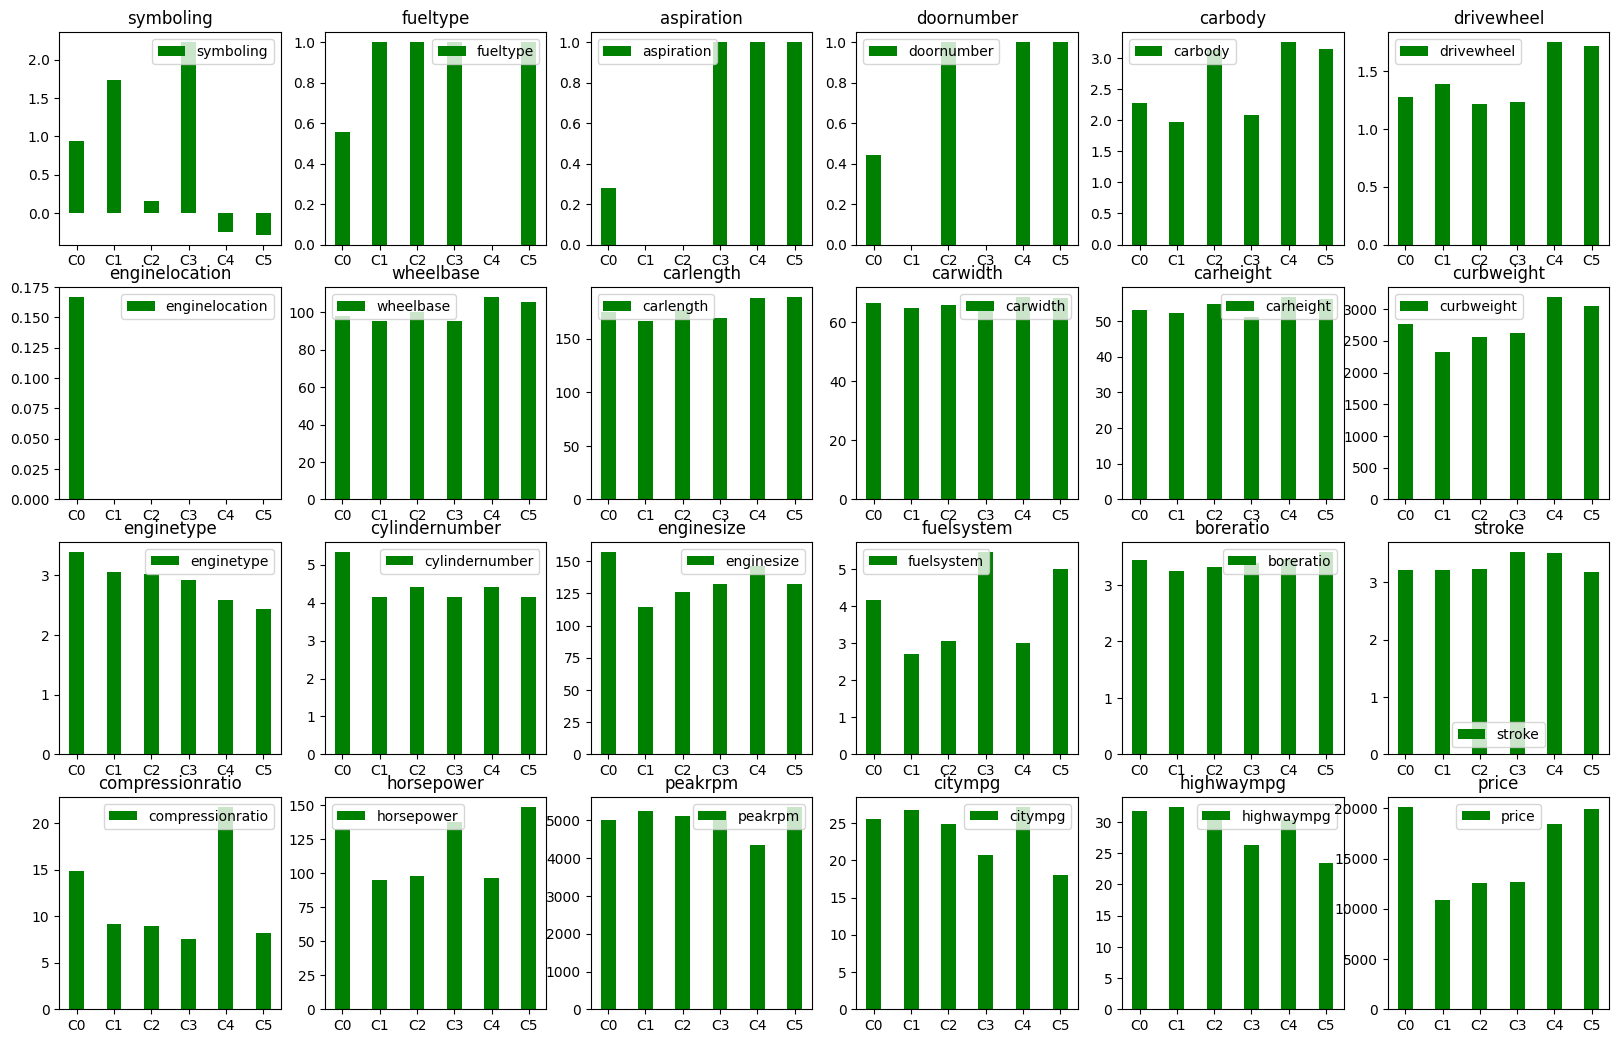

In [15]:
XLabel = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
UselessColumn = ['car_ID', 'CarName']
# Car = pd.read_csv('car_price.csv')
labels_valid = dblabels
Car = nf
Car = Car.copy().iloc[labels_valid!=-1, :]
CarCluster = pd.concat([Car, pd.DataFrame(labels_valid)], axis=1)
CarCluster.rename({0:'Class'}, axis=1, inplace=True)
CategoryColumn = CarCluster.select_dtypes(include = 'object').columns
# print(CarCluster)

# print(CarCluster)
print('六类的ID:')
print()
for i in range(6):
    label = CarCluster.loc[CarCluster['Class']==i]
    da = np.array(list(label['car_ID'].to_numpy()))
    print("No.{}".format(i), da)
    print()
print('六类的产品名:')
print()
for i in range(6):
    label = CarCluster.loc[CarCluster['Class']==i]
    da = list(label['CarName'].to_numpy())
    print("No.{}".format(i), da)
    print()

print("每一类的平均特征如下")
# Mean = CarCluster.drop(UselessColumn, axis=1).drop(CategoryColumn, axis=1).groupby('Class').mean()
Mean = CarCluster.drop(UselessColumn, axis=1).groupby('Class').mean()
plt.figure(figsize=(20, 16))
n = 1
for i in Mean.columns:
    plt.subplot(5, 6, n)
    X = list(range(len(XLabel)))
    plt.bar(X, Mean[i], width = 0.4, label = i, tick_label = XLabel, fc = 'green')
    plt.title(i)
    n += 1
    plt.legend()
plt.show()